In [7]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from scipy import linalg
import scipy.io as sio
import pprint as pp
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import gc
# pre
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer
# Study
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
import matplotlib as mpl
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from time import time

# helpers files
import infoStructure as ins
import helpers as hp
import display as dp
import clustering as cl
import importlib #importlib.reload(foo)

In [8]:
SMLDDir = '/sanssauvegarde/homes/v18porti/info/Brest_Samples/'
BIGDDir = '/media/v18porti/ADATA SH14/stg/Brest/'
MDIR = BIGDDir

In [16]:
#importlib.reload(cl)
#importlib.reload(dp)
#importlib.reload(hp)
importlib.reload(ins)

<module 'infoStructure' from '/homes/v18porti/Documents/code/imt_stg/infoStructure.py'>

### Get LABELS

In [10]:
labels = ins.getFirstOneInfo(MDIR + 'RS10001/RS10001_170503_100212.mat')

In [12]:
t0 = time()
feat_dict = ins.addAllPatientsInfoV2(MDIR, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], 5)
print("total time:", round(time()-t0, 3), "s")

Working on RS10000
vectorRRKLD
124358
28119
vectorFAmpKLD
124358
28119
vectorUFAmpKLD
124358
28119
vectorCorrKLD
124358
28119
Working on RS10001
vectorRRKLD
25986
25586
24099
vectorFAmpKLD
25986
25586
24099
vectorUFAmpKLD
25986
25586
24099
vectorCorrKLD
25986
25586
24099
Working on RS10002
vectorRRKLD
15632
16810
16168
vectorFAmpKLD
15632
16810
16168
vectorUFAmpKLD
15632
16810
16168
vectorCorrKLD
15632
16810
16168
Working on RS10003
vectorRRKLD
84364
88379
85139
vectorFAmpKLD
84364
88379
85139
vectorUFAmpKLD
84364
88379
85139
vectorCorrKLD
84364
88379
85139
total time: 8.631 s


### Get features info

In [17]:
t0 = time()
vectorRRKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorRRKLD', 5)
vectorFAmpKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorFAmpKLD', 5)
vectorUFAmpKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorUFAmpKLD', 5)
vectorCorrKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorCorrKLD', 5)
print( "total time:", round(time()-t0, 3), "s")

Working on vectorRRKLD - RS10000
Working on vectorRRKLD - RS10001
Working on vectorRRKLD - RS10002
Working on vectorRRKLD - RS10003
Working on vectorFAmpKLD - RS10000
Working on vectorFAmpKLD - RS10001
Working on vectorFAmpKLD - RS10002
Working on vectorFAmpKLD - RS10003
Working on vectorUFAmpKLD - RS10000
Working on vectorUFAmpKLD - RS10001
Working on vectorUFAmpKLD - RS10002
Working on vectorUFAmpKLD - RS10003
Working on vectorCorrKLD - RS10000
Working on vectorCorrKLD - RS10001
Working on vectorCorrKLD - RS10002
Working on vectorCorrKLD - RS10003
total time: 32.354 s


In [18]:
print(vectorRRKLD_ALL.shape)
print(vectorFAmpKLD_ALL.shape)
print(vectorUFAmpKLD_ALL.shape)
print(vectorCorrKLD_ALL.shape)

(534640,)
(534640,)
(534640,)
(534640,)


### Tranform to a dataframe to be able to work better with it

In [6]:
df_ALL = hp.convertDictInDF(hp.putDataInDict(
        [vectorRRKLD_ALL, vectorFAmpKLD_ALL, vectorUFAmpKLD_ALL, vectorCorrKLD_ALL],
        ['vectorRRKLD_ALL', 'vectorFAmpKLD_ALL', 'vectorUFAmpKLD_ALL', 'vectorCorrKLD_ALL']
    ))

In [7]:
df_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227035 entries, 0 to 227034
Data columns (total 4 columns):
vectorRRKLD_ALL       227029 non-null float64
vectorFAmpKLD_ALL     227035 non-null float64
vectorUFAmpKLD_ALL    227035 non-null float64
vectorCorrKLD_ALL     227035 non-null float64
dtypes: float64(4)
memory usage: 6.9 MB


In [8]:
df_ALL.describe()

,vectorRRKLD_ALL,vectorFAmpKLD_ALL,vectorUFAmpKLD_ALL,vectorCorrKLD_ALL
count,227029.000000,227035.000000,227035.000000,227035.000000
mean,12.473469,9.354833,18.456393,7.463934
std,3.292251,14.124923,15.299198,2.910295
min,8.741988,2.739244,4.854638,0.000764
25%,10.527782,6.022472,12.564055,5.578577
50%,11.696346,7.297211,14.917339,7.000749
75%,13.697694,9.240294,19.237986,8.925457
max,205.866913,458.070251,640.493042,49.242596


In [9]:
df_ALL.corr()

,vectorRRKLD_ALL,vectorFAmpKLD_ALL,vectorUFAmpKLD_ALL,vectorCorrKLD_ALL
vectorRRKLD_ALL,1.000000,0.163057,0.193009,0.178031
vectorFAmpKLD_ALL,0.163057,1.000000,0.922950,-0.062243
vectorUFAmpKLD_ALL,0.193009,0.922950,1.000000,0.208356
vectorCorrKLD_ALL,0.178031,-0.062243,0.208356,1.000000


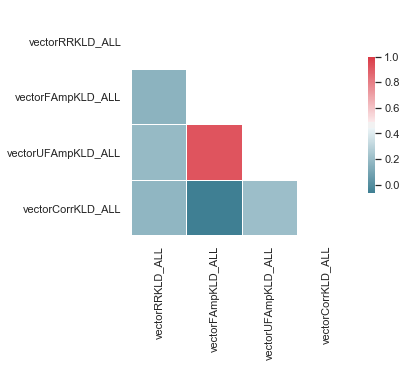

In [10]:
%matplotlib inline
dp.draw_correlation_matrix(df_ALL)

/homes/v18porti/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/v18porti/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


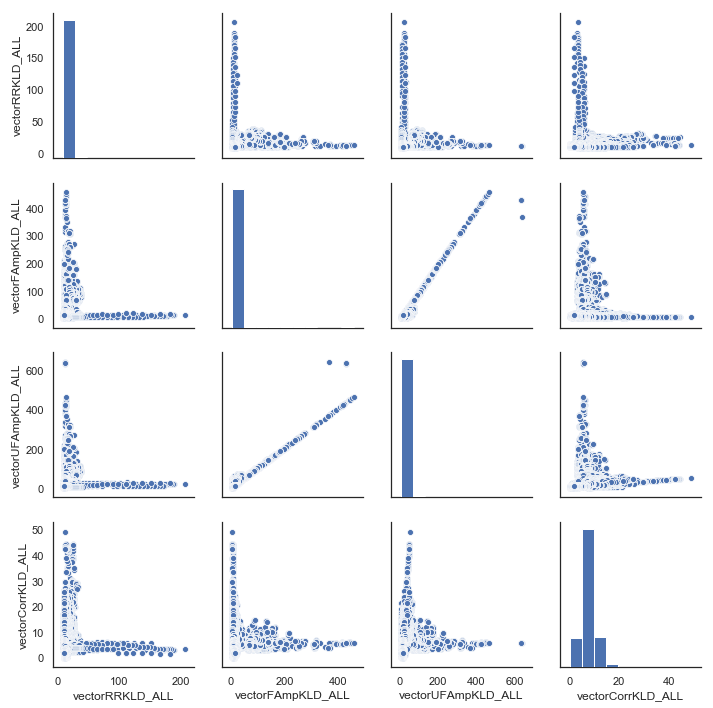

In [11]:
sns.pairplot(df_ALL)

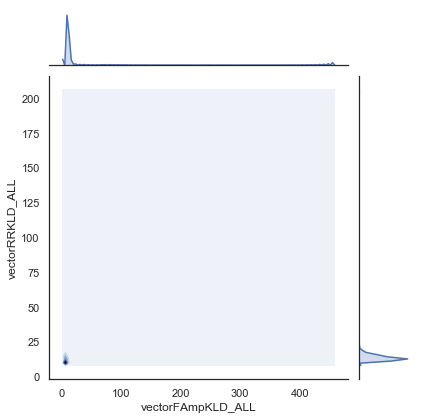

In [14]:
sns.jointplot(df_ALL['vectorFAmpKLD_ALL'], df_ALL['vectorRRKLD_ALL'], kind="kde")

### Pre processing

In [15]:
len(df_ALL) - df_ALL.count()

vectorRRKLD_ALL       6
vectorFAmpKLD_ALL     0
vectorUFAmpKLD_ALL    0
vectorCorrKLD_ALL     0
dtype: int64

In [16]:
num_attribs = list(df_ALL)

pipeline = Pipeline([
        ('selector', hp.DataFrameSelector(num_attribs)), # to handle pandas data frame
        ('imputer', Imputer(strategy="median")), # fill missing values with median
        ('std_scaler', StandardScaler())
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ("main", pipeline),
    ])

data_prepared = full_pipeline.fit_transform(df_ALL)

In [17]:
df_normalized = hp.convertDictInDF(hp.putDataInDict(
        [data_prepared[:,0], data_prepared[:,1], data_prepared[:,2], data_prepared[:,3]],
        ['vectorRRKLD_N', 'vectorFAmpKLD_N', 'vectorUFAmpKLD_N', 'vectorCorrKLD_N']
    ))
df_normalized.describe()

,vectorRRKLD_N,vectorFAmpKLD_N,vectorUFAmpKLD_N,vectorCorrKLD_N
count,2.270350e+05,2.270350e+05,2.270350e+05,2.270350e+05
mean,-2.323461e-16,-1.226827e-17,6.008950e-17,3.204774e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.133423e+00,-4.683639e-01,-8.890521e-01,-2.564409e+00
25%,-5.909835e-01,-2.359212e-01,-3.851411e-01,-6.478248e-01
50%,-2.360431e-01,-1.456735e-01,-2.313233e-01,-1.591543e-01
75%,3.718563e-01,-8.109020e-03,5.108730e-02,5.021920e-01
max,5.874288e+01,3.176771e+01,4.065821e+01,1.435551e+01


### PCA

>*[0.50219192 0.28210948 0.20605092 0.00964767]* : first 3 carries the most info with standarized data (95%)
>
>*[0.92169138 0.04827627 0.02278563 0.00724673]* : first 1 carries the most info without standarizing data
>
> This is how we know we should standarize since it permits the other 2 axes to participate

In [18]:
X = data_prepared

In [21]:
pca = PCA(n_components=0.95)
pca.fit(X)  
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)
print(pca.components_)

[0.50219192 0.28210948 0.20605092]
[675.32256862 506.15699797 432.5772608 ]
[[ 0.2642539   0.66144469  0.68621232  0.1475583 ]
 [ 0.55349939 -0.30205909 -0.08781538  0.77115964]
 [ 0.7897125   0.00145624 -0.17936112 -0.58666995]]


In [22]:
X_New = pca.transform(X)
principalDf = pd.DataFrame(data=X_New, columns=['pc1', 'pc2', 'pc3'])

In [ ]:
%matplotlib notebook
dp.print3dScatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'])

In [ ]:
plt.clf()
plt.close()

In [ ]:
%matplotlib inline

In [ ]:
dp.printScatter(principalDf['pc1'], principalDf['pc2'])
dp.printScatter(principalDf['pc1'], principalDf['pc3'])
dp.printScatter(principalDf['pc2'], principalDf['pc3'])

In [ ]:
titles = principalDf.columns.tolist()
principalDf.describe()

## ------{ X to use }-----

In [ ]:
X = X_New

## 1 Gaussian Mixture Model

https://scikit-learn.org/stable/unsupervised_learning.html


In [ ]:
importlib.reload(cl)
importlib.reload(dp)
importlib.reload(hp)

In [ ]:
n_components_range = range(1, 7)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(X, n_components_range)

In [ ]:
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange', 'gold', 'tomato'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.getPlotGMM(best_gmm, X, color_iter, 0, 1, ax[0], titles)
dp.getPlotGMM(best_gmm, X, color_iter, 1, 2, ax[1], titles)
dp.getPlotGMM(best_gmm, X, color_iter, 0, 2, ax[2], titles)
plt.show()
fig.clf()
plt.close()

In [ ]:
hp.getRepresentativeness(best_gmm, X, Y_)

## 2 K-Means

[2, 3, 4, 5] components

In [ ]:
Y_, km = cl.getKmeanskClusters(2, X)
dp.printThreeKMaeans(X, Y_, titles)
print(hp.getRepresentativenessKM(km, X, Y_))
Y_, km = cl.getKmeanskClusters(3, X)
dp.printThreeKMaeans(X, Y_, titles)
print(hp.getRepresentativenessKM(km, X, Y_))
Y_, km = cl.getKmeanskClusters(4, X)
dp.printThreeKMaeans(X, Y_, titles)
print(hp.getRepresentativenessKM(km, X, Y_))
Y_, km = cl.getKmeanskClusters(5, X)
dp.printThreeKMaeans(X, Y_, titles)
print(hp.getRepresentativenessKM(km, X, Y_))

## 3 Mean Shift
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

> Bandwidth is not very different with quantity of samples 50000 or 100000, so for ease of computation, we will use 50000.
> 
> Quantile, it increases  the value of the bandwith, 0.3, gets 1.76 with 7 components, 0.5, gets 2.26 with 4 components

In [ ]:
bandwidth = estimate_bandwidth(X, n_samples=50000, quantile=0.3)
bandwidth

In [ ]:
bandwidth2 = estimate_bandwidth(X, n_samples=50000, quantile=0.5)
bandwidth2

In [ ]:
bandwidth3 = estimate_bandwidth(X, n_samples=50000, quantile=0.7)
bandwidth3

In [ ]:
bandwidth4 = estimate_bandwidth(X, n_samples=50000, quantile=0.2)
bandwidth4

In [ ]:
ms, n_clusters_, cluster_centers, labels = cl.meanClustering(X, bandwidth)
print(hp.getRepresentativenessKM(ms, X, ms.predict(X)))
dp.plotMSh(X, ms, n_clusters_, cluster_centers, labels)

In [ ]:
ms1, n_clusters_1, cluster_centers1, labels1 = cl.meanClustering(X, bandwidth2)
print(hp.getRepresentativenessKM(ms1, X, ms1.predict(X)))
dp.plotMSh(X, ms1, n_clusters_1, cluster_centers1, labels1)

## 4 Variational Bayesian Gaussian Mixture

Having 5 components, changig the n_init, it has a better distribution in "representativeness" with a value of 2 and max_iter = 200

In [ ]:
dpgmm1 = BayesianGaussianMixture(n_components=5,
                                max_iter=200, n_init=2,
                                covariance_type='full').fit(X)
#print(dpgmm1.means_)
#print(dpgmm1.covariances_)
Y_ = dpgmm1.predict(X)
print(hp.getRepresentativeness(dpgmm1, X, Y_))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, Y_, dpgmm1.means_, dpgmm1.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, Y_, dpgmm1.means_, dpgmm1.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, Y_, dpgmm1.means_, dpgmm1.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

In [ ]:
dpgmm2 = BayesianGaussianMixture(n_components=5,
                                max_iter=100, n_init=2,
                                covariance_type='full').fit(X)
#print(dpgmm2.means_)
#print(dpgmm2.covariances_)
Y_ = dpgmm2.predict(X)
print(hp.getRepresentativeness(dpgmm2, X, Y_))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, Y_, dpgmm2.means_, dpgmm2.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, Y_, dpgmm2.means_, dpgmm2.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, Y_, dpgmm2.means_, dpgmm2.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

In [ ]:
dpgmm3 = BayesianGaussianMixture(n_components=5,
                                max_iter=200,
                                covariance_type='full').fit(X)
#print(dpgmm3.means_)
#print(dpgmm3.covariances_)
Y_ = dpgmm3.predict(X)
print(hp.getRepresentativeness(dpgmm3, X, Y_))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, Y_, dpgmm3.means_, dpgmm3.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, Y_, dpgmm3.means_, dpgmm3.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, Y_, dpgmm3.means_, dpgmm3.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

In [ ]:
dpgmm4 = BayesianGaussianMixture(n_components=5,
                                max_iter=100,
                                covariance_type='full').fit(X)
#print(dpgmm4.means_)
#print(dpgmm4.covariances_)
Y_ = dpgmm4.predict(X)
print(hp.getRepresentativeness(dpgmm4, X, Y_))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, Y_, dpgmm4.means_, dpgmm4.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, Y_, dpgmm4.means_, dpgmm4.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, Y_, dpgmm4.means_, dpgmm4.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()